In [2]:
from my_functions import cutting, massage, mapping, masking
import my_functions

In [7]:
# test cutting
my_dict={'LOGM': [6,9], 'LOGSFR': [-10,0]}
my_data='FujiBGSPhysProp_v1.1'
#cutting(my_data, my_dict)

# check that it worked (you can change the key to whatever param)
print('Min: ', cutting(my_data, my_dict)['LOGSFR'].min())
print('Max: ', cutting(my_data, my_dict)['LOGSFR'].max())

Min:  -9.9658977026794
Max:  -0.0008482402851721889


In [4]:
# test massage
item=massage(cutting(my_data, my_dict), 'this_test')

- read input catalog from this_test.txt
- add halo masses
- add integrated tau
- add integrated kSZ
- add integrated y
- write full catalog to ../output/catalog/this_test/catalog.txt
- load full catalog from ../output/catalog/this_test/catalog.txt
- load full catalog from ../output/catalog/this_test/catalog.txt


In [4]:
# testing mapping

imap=mapping('act_dr5.01_s08s18_AA_f150_night_map.fits.txt')

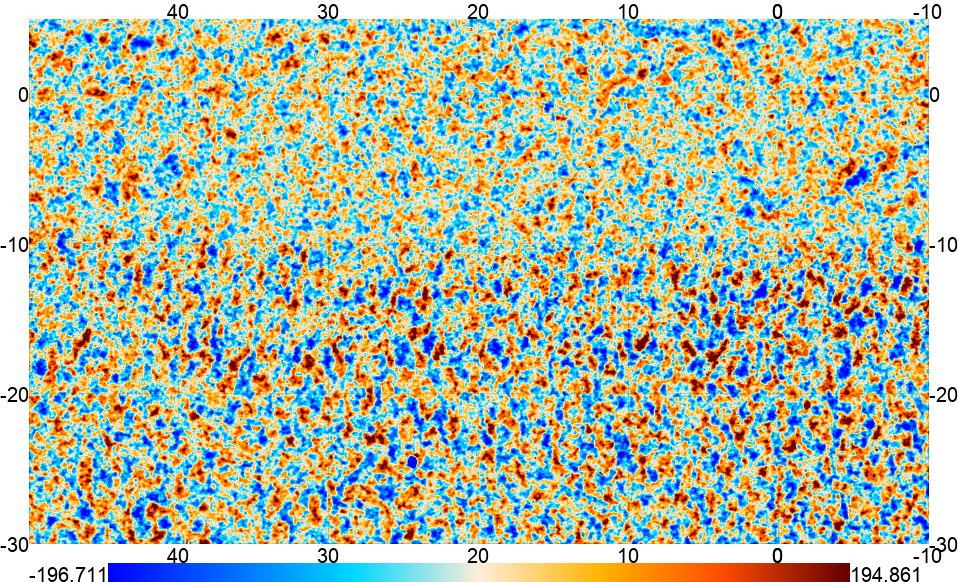

In [6]:
from pixell import enplot
def eshow(x,**kwargs): 
    ''' Define a function to help us plot the maps neatly '''
    plots = enplot.get_plots(x, **kwargs)
    enplot.show(plots, method = "ipython")
    
# add "color", "min", "max", "range" etc keys here to adjust your plot
keys = {"downgrade": 8, "ticks": 10, "colorbar": True}  # def color is planck
keys_ex = {"downgrade": 8, "ticks": 10, "colorbar": True, 'color': 'planck', 
           'min': -200, 'max': 100}  

eshow(imap, **keys) 

In [2]:
new_map=masking('act_dr5.01_s08s18_AA_f150_night_map.fits.txt')

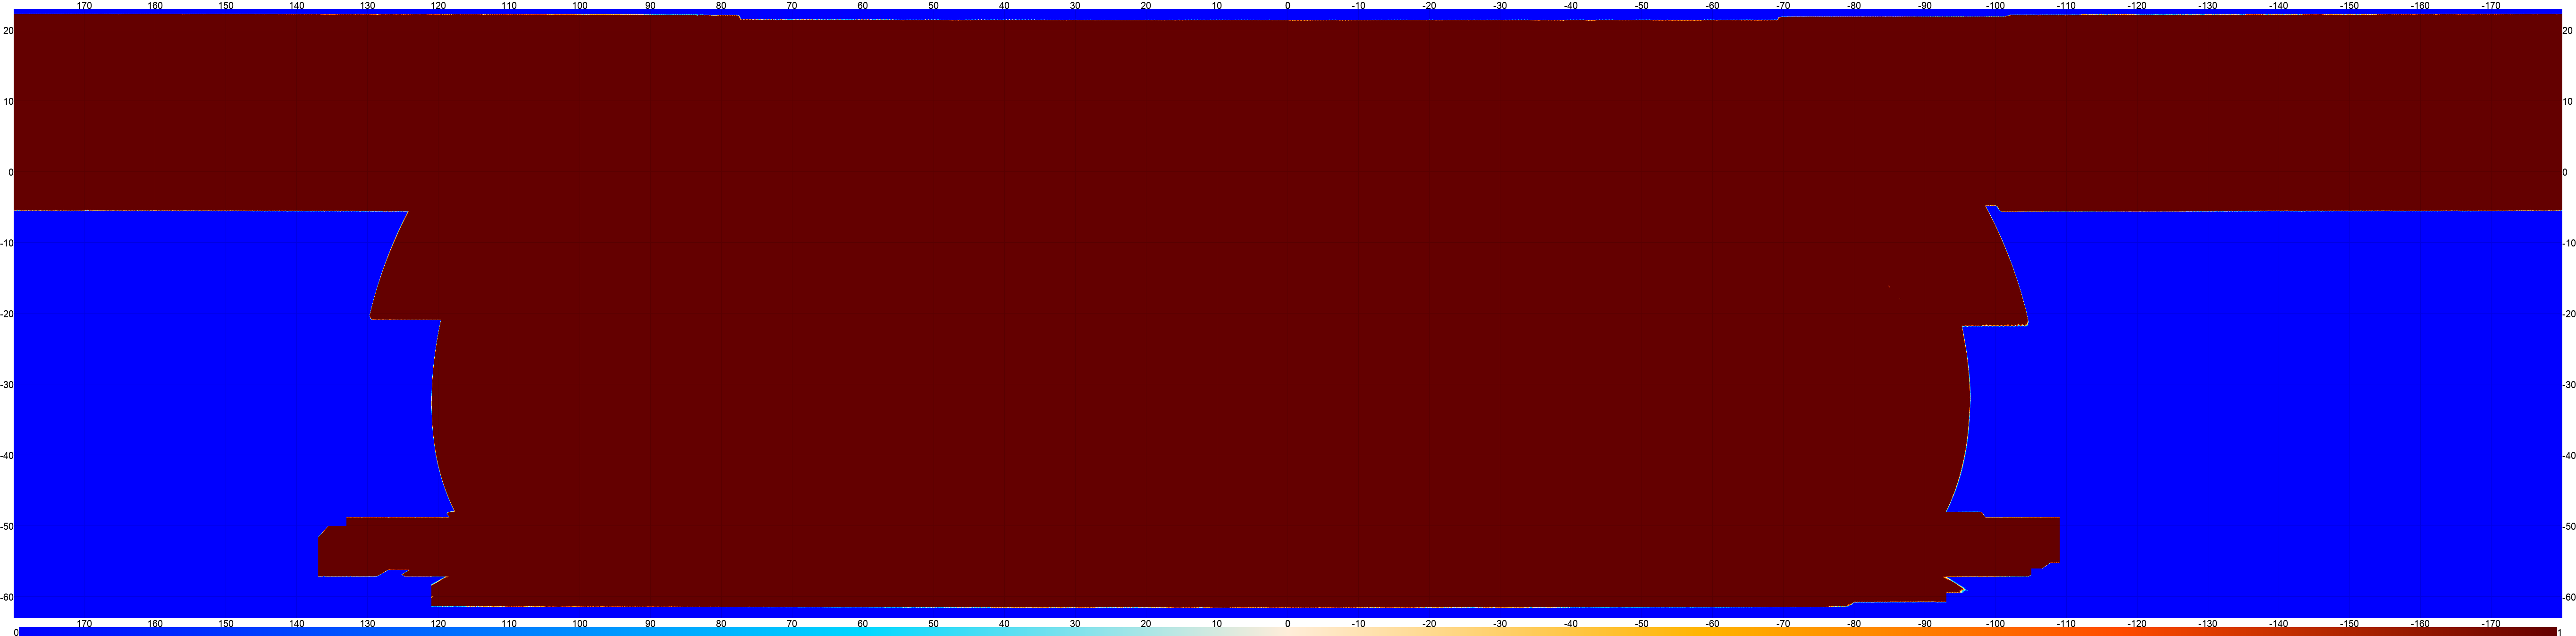

In [3]:
from pixell import enplot
def eshow(x,**kwargs): 
    ''' Define a function to help us plot the maps neatly '''
    plots = enplot.get_plots(x, **kwargs)
    enplot.show(plots, method = "ipython")
    
# add "color", "min", "max", "range" etc keys here to adjust your plot
keys = {"downgrade": 8, "ticks": 10, "colorbar": True}  # def color is planck
keys_ex = {"downgrade": 8, "ticks": 10, "colorbar": True, 'color': 'planck', 
           'min': -200, 'max': 100}  

eshow(new_map, **keys) 

In [2]:
# see if thumbstack works given all the new functions:
#sys.path.append('../jupyter_note/')
from my_functions import cutting, massage, mapping, masking
import my_functions
from cmbMap import *

imap=mapping('act_dr5.01_s08s18_AA_f150_night_map.fits.txt')

new_map=masking('act_dr5.01_s08s18_AA_f150_night_map.fits.txt')
'''
cmap = cmbMap('act_dr5.01_s08s18_AA_f150_night_map.fits.txt',
              pathMask=new_map,
              # pathMask=pathMask,
              # "act_dr5.01_s08s18_AA_f150_daynight_ivar.fits",
              pathHit=None,
              name='that_test')
'''
my_dict={'LOGM': [6,9], 'LOGSFR': [-10,0]}
my_data='FujiBGSPhysProp_v1.1'

item=massage(cutting(my_data, my_dict), 'this_test')

FileNotFoundError: [Errno 2] No such file or directory: 'act_dr5.01_s08s18_AA_f150_night_map.fits.txt'

In [8]:
import sys
sys.path.append('../src/')

from importlib import reload
import universe
reload(universe)
from universe import *

import mass_conversion
reload(mass_conversion)
from mass_conversion import *

import catalog
reload(catalog)
from catalog import *

import thumbstack
reload(thumbstack)
from thumbstack import *

catalog = item
u = UnivMariana()
filterType = 'diskring'
nProc=64
save=True

ts = ThumbStack(u, catalog, 
                imap, 
                new_map, 
                #cmap.hit(), 
                catalog.name + '_act_test1',
                nameLong=None, 
                save=save, 
                nProc=nProc,
                filterTypes=filterType,
                doMBins=False, 
                doBootstrap=True,
                # doStackedMap=True,
                doVShuffle=False, 
                #cmbNu=cmap.nu, 
                #cmbUnitLatex=cmap.unitLatex,
                rApMinArcmin=1.,
                pathOut='')

- Thumbstack: test


AttributeError: Can't pickle local object 'ProcessBackend.StorageFactory.<locals>.<lambda>'